<a href="https://colab.research.google.com/github/JJungEEun/2023_DaconStudy/blob/main/%EA%B4%91%EC%A7%84%EA%B5%AC_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B3%B5%EB%AA%A8%EC%A0%84/%EB%B6%88%EB%B2%95%EC%A3%BC%EC%A0%95%EC%B0%A8_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import random
import pandas as pd
import numpy as np
import os
import seaborn as sns
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

import warnings
warnings.filterwarnings(action='ignore') 

import datetime

In [3]:
cd /content/drive/MyDrive/2023/광진구공모전

/content/drive/MyDrive/2023/광진구공모전


In [4]:
# df2019 = pd.read_csv('데이터/서울특별시_광진구_주정차단속현황_20190102.csv', encoding='cp949')
# df2020 = pd.read_csv('데이터/서울특별시_광진구_주정차 단속현황_20210610.csv', encoding='cp949')
df2021 = pd.read_csv('데이터/서울특별시_광진구_주정차단속현황_20220610.csv', encoding='cp949')

In [ ]:
df2021.head(3)

,단속일시,단속원금,단속동,단속장소,위반내용,견인지시,데이터기준일자
0,2015-01-01 06:44,40000,화양동,119-4,주정차금지,견인처리,2022-06-10
1,2015-01-01 07:01,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,2022-06-10
2,2015-01-01 07:24,50000,구의동,동서울터미널 주차장앞,32조내지 34조위반,미견인,2022-06-10


In [5]:
df2021['단속일시'] = pd.to_datetime(df2021['단속일시'])

df2021['년도'] = df2021['단속일시'].dt.year
df2021['월'] = df2021['단속일시'].dt.month
df2021['시간'] = df2021['단속일시'].dt.hour

df2021['weekday'] = df2021['단속일시'].dt.weekday
weekday_list = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
df2021['요일'] = df2021.apply(lambda x : weekday_list[x['weekday']], axis = 1)

In [ ]:
df2021.head(3)

,단속일시,단속원금,단속동,단속장소,위반내용,견인지시,데이터기준일자,년도,월,시간,weekday,요일
0,2015-01-01 06:44:00,40000,화양동,119-4,주정차금지,견인처리,2022-06-10,2015,1,6,3,목요일
1,2015-01-01 07:01:00,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,2022-06-10,2015,1,7,3,목요일
2,2015-01-01 07:24:00,50000,구의동,동서울터미널 주차장앞,32조내지 34조위반,미견인,2022-06-10,2015,1,7,3,목요일


### EDA

#### 시간변수

<AxesSubplot:>

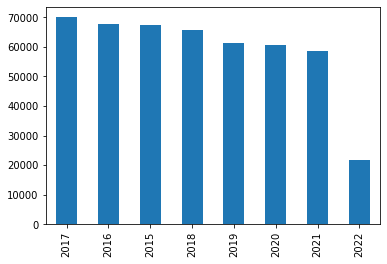

In [ ]:
df2021['년도'].value_counts().plot(kind='bar')

- 2022년 데이터는 5월까지 밖에 없어서 count가 작음

<AxesSubplot:>

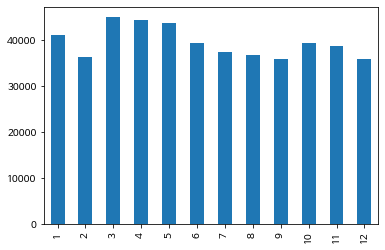

In [ ]:
df2021['월'].value_counts().sort_index().plot(kind='bar')

- 3, 4, 5월이 불법주정차가 많음

<AxesSubplot:>

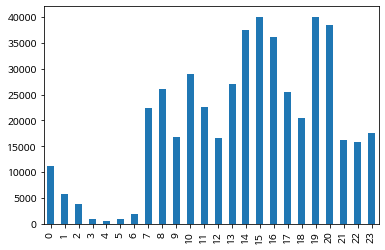

In [ ]:
df2021['시간'].value_counts().sort_index().plot(kind='bar')

- 15, 19, 20시가 불법주정차 단속이 많다

<AxesSubplot:>

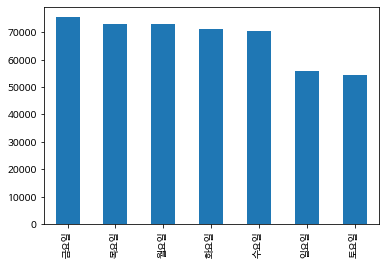

In [ ]:
df2021['요일'].value_counts().plot(kind='bar')

- 주말 제외 비슷함

#### 동별

<AxesSubplot:>

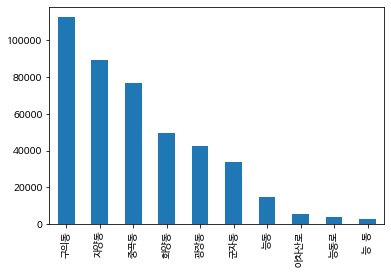

In [ ]:
df2021['단속동'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

- 주차단속: 구의동 > 자양동 > 중곡동 > 화양동 > 광장동
- 유동인구: 자양동 > 구의동 > 중곡동 > 광장동 > 화양동
- 유동인구 top5와 주차단속 top5가 일치
- 유동인구가 자양동(491,974명), 구의동(328,046명)으로 자양동이 훨씬 많은데 주차단속은 구의동이 더 높음
  - 구의동에 무슨 문제가 ?

In [ ]:
print("전체 데이터: ", df2021.shape)
print("동 데이터: ", df2021[df2021['단속동'].str.endswith('동')].shape)
print("그 외: ", df2021[~df2021['단속동'].str.endswith('동')].shape)

전체 데이터:  (473074, 12)
동 데이터:  (421463, 12)
그 외:  (51611, 12)


In [ ]:
동df = df2021[df2021['단속동'].str.endswith('동')]

구의동df = 동df[동df['단속동']=='구의동']
자양동df = 동df[동df['단속동']=='자양동']
중곡동df = 동df[동df['단속동']=='중곡동']
화양동df = 동df[동df['단속동']=='화양동']
광장동df = 동df[동df['단속동']=='광장동']

In [ ]:
%matplotlib inline
plt.style.use('ggplot')

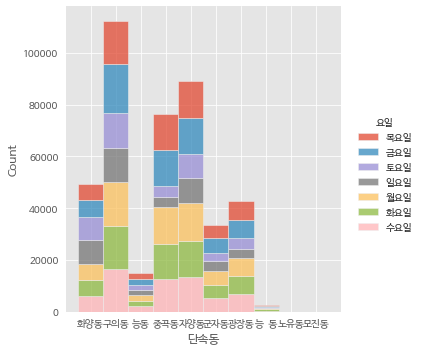

In [ ]:
sns.displot(동df, x='단속동', hue='요일',multiple="stack")
plt.show()

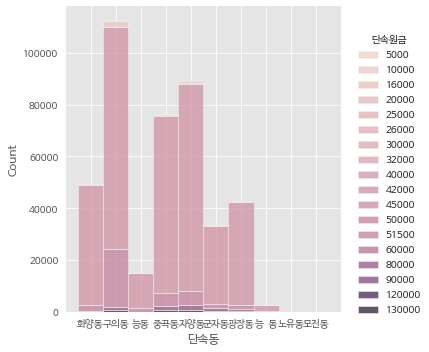

In [ ]:
sns.displot(동df, x='단속동', hue='단속원금',multiple="stack")
plt.show()

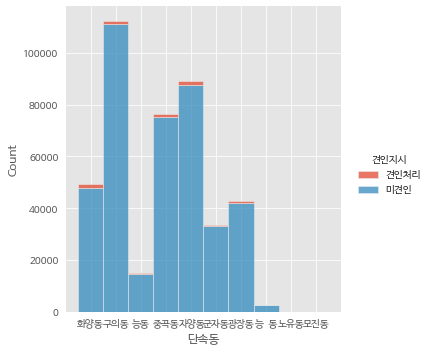

In [ ]:
sns.displot(동df, x='단속동', hue='견인지시',multiple="stack")
plt.show()

<AxesSubplot:xlabel='단속동', ylabel='단속원금'>

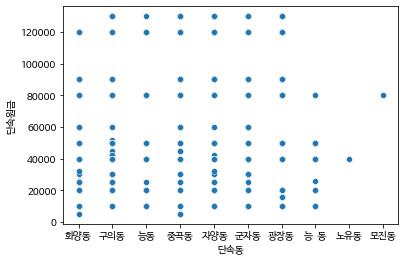

In [ ]:
sns.scatterplot(x='단속동',y='단속원금', data=동df)

#### 단속장소 / 단속 내용 / 단속 금액

<AxesSubplot:>

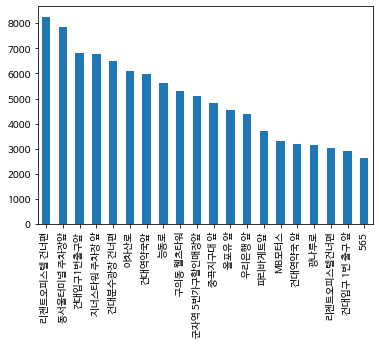

In [ ]:
df2021['단속장소'].value_counts().sort_values(ascending = False)[:20].plot(kind='bar')

- 리젠트오피스텔건너편, 동서울터미널 주차장앞, 건대입구 1번출구 앞, 지너스타워 주차장 앞이 주차단속이 많다

<AxesSubplot:>

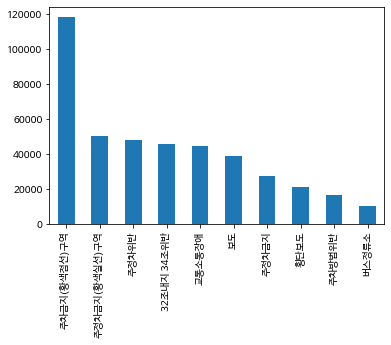

In [ ]:
df2021['위반내용'].value_counts().sort_values(ascending = False)[:10].plot(kind='bar')

- 주차금지(황색점선 구역)이 압도적으로 많다

<AxesSubplot:>

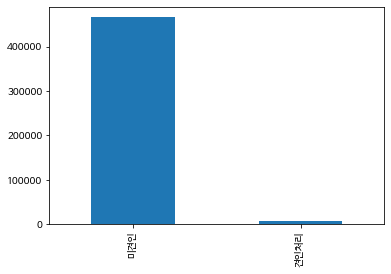

In [ ]:
df2021['견인지시'].value_counts().plot(kind='bar')

In [ ]:
list(set(df2021[df2021['견인지시']=='견인처리']['위반내용'].unique()).difference(df2021[df2021['견인지시']!='견인처리']['위반내용'].unique()))

['공사구역', '기타']

In [ ]:
df2021[(df2021['위반내용']=='공사구역')|(df2021['위반내용']=='기타')]

,단속일시,단속원금,단속동,단속장소,위반내용,견인지시,데이터기준일자,년도,월,시간,weekday,요일
22402,2015-04-14 09:13:00,40000,구의동,광날루로41길62,공사구역,견인처리,2022-06-10,2015,4,9,1,화요일
66437,2015-12-25 12:21:00,50000,중곡동,중광초정문,기타,견인처리,2022-06-10,2015,12,12,4,금요일
98392,2016-07-08 17:44:00,40000,화양동,선기형닭한마리,기타,견인처리,2022-06-10,2016,7,17,4,금요일
107444,2016-08-23 10:39:00,40000,구의동,동대부여고,공사구역,견인처리,2022-06-10,2016,8,10,1,화요일


<AxesSubplot:>

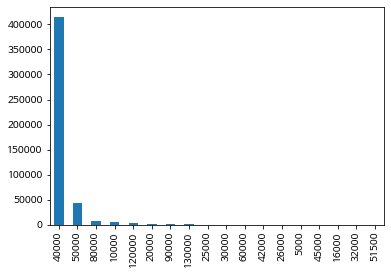

In [ ]:
df2021['단속원금'].value_counts().plot(kind='bar')

In [ ]:
df2021[(df2021['단속원금']==51500)]

,단속일시,단속원금,단속동,단속장소,위반내용,견인지시,데이터기준일자,년도,월,시간,weekday,요일
173502,2017-07-16 07:24:00,51500,구의동,동서울터미널 주차장앞,주정차금지(황색실선)구역,미견인,2022-06-10,2017,7,7,6,일요일


In [ ]:
df2021[(df2021['단속원금']==130000)]['위반내용'].unique()

array(['주차금지(황색점선)구역', '교통소통장애', '보도', '도로 모퉁이', '횡단보도', '주정차금지(황색실선)구역',
       '주차방법위반', '특별구역'], dtype=object)

In [ ]:
df2021[(df2021['단속원금']==40000)]['위반내용'].unique()

array(['주정차금지', '32조내지 34조위반', '주정차위반', '안전지대사방', '보도주차', '모퉁이', '주차방법위반',
       '횡단보도', '버스정류장', '보차도', '소화전,소방용기기', '건널목,횡단보도', '소통장해',
       '황색실선,황색점선', '교차로,모퉁이', '도로교통법 제32조', '보도막음', '통학로', '이중주차',
       '어린이보호구역', '중앙선', '라인밖', '민원신고', '도로교통법 제34조', '교차로', '공사구역', '차도',
       '도로교통법 제33조', '32조위반', '유턴지역', '소화전', '교통장애', '기타', '주정차금지구역',
       '주정차금지(황색실선)구역', '보도', '일방통행', '안전지대', '버스정류소', '주차금지(황색점선)구역',
       '도로 모퉁이', '화재경보기', '교통소통장애', '건널목', '터널', '이면도로주차', '주차구획선외 주차',
       '소방기계 비치장소', '도로공사구역', '다리', '거주자우선', '소방차(긴급차량)통행장애',
       '교차로,횡단보도,보도', '특별구역'], dtype=object)

### CCTV

In [6]:
cctv = pd.read_csv('데이터/서울특별시_광진구_불법주정차 위반 단속 CCTV 위치정보_20220502.csv', encoding='cp949')

In [7]:
cctv.head(3)

,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분
0,서울 광진구 광장동 334-2,37.547790,127.10699,광진구,모두투어앞,불법주정차구역
1,서울 광진구 광장동 445-3,37.543799,127.10241,광진구,광현교회 앞,불법주정차구역
2,서울 광진구 구의동 135,37.549593,127.08178,광진구,아차산역 5번출구 앞,불법주정차구역


In [8]:
cctv = cctv.rename(columns={'단속지점명' : '단속장소'})
cctv_df = pd.merge(df2021, cctv, on='단속장소')

In [9]:
cctv_df.head(3)

,단속일시,단속원금,단속동,단속장소,위반내용,견인지시,데이터기준일자,년도,월,시간,weekday,요일,고정형CCTV지번주소,위도,경도,자치구,현장구분
0,2015-01-02 15:13:00,40000,군자동,군자빌딩,32조내지 34조위반,미견인,2022-06-10,2015,1,15,4,금요일,서울 광진구 군자동 466-17,37.558614,127.075273,광진구,불법주정차구역
1,2015-01-07 17:56:00,40000,군자동,군자빌딩,32조내지 34조위반,미견인,2022-06-10,2015,1,17,2,수요일,서울 광진구 군자동 466-17,37.558614,127.075273,광진구,불법주정차구역
2,2015-01-27 11:11:00,40000,군자동,군자빌딩,32조내지 34조위반,미견인,2022-06-10,2015,1,11,1,화요일,서울 광진구 군자동 466-17,37.558614,127.075273,광진구,불법주정차구역


In [ ]:
print(df2021.shape)
print(cctv_df.shape)
print(cctv_df.shape[0]/df2021.shape[0]*100)

(473074, 12)
(67282, 17)
14.222299259735264


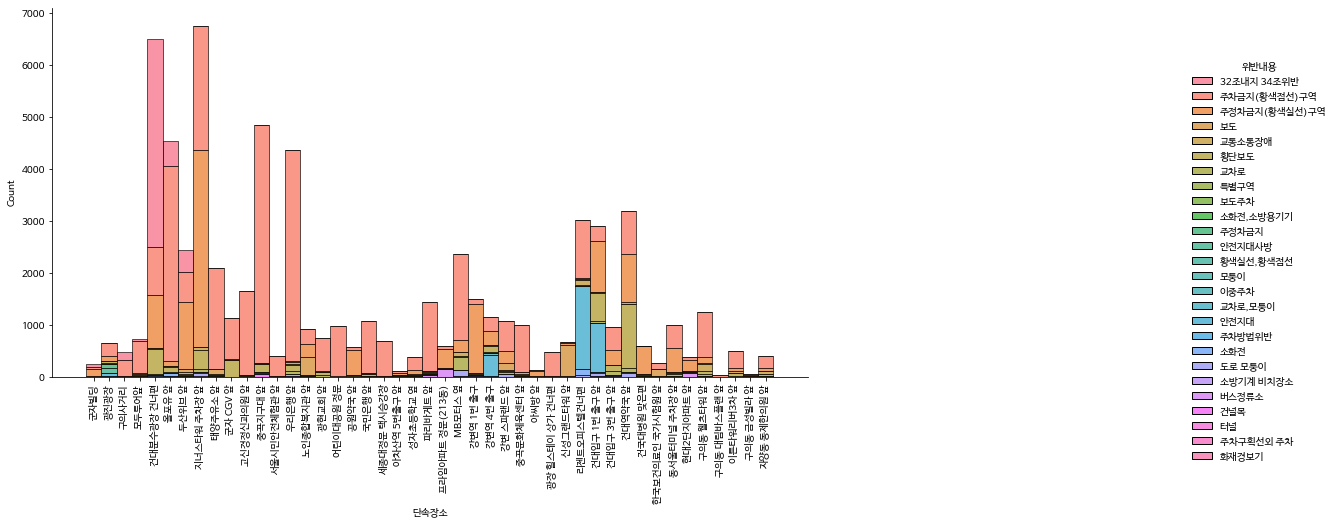

In [ ]:
fig= sns.displot(cctv_df, x='단속장소',hue='위반내용',multiple="stack")
fig.fig.set_size_inches(20,6)
plt.xticks(rotation=90)
plt.show()

- cctv 단속 차량: 32조내지 34조위반 / 주정차금지가 많다
- 지너스타워주차장앞, 건대분수광장건너편 불법 단속 많음
- 지너스타워주차장이 자리가 많이 부족한가 ?

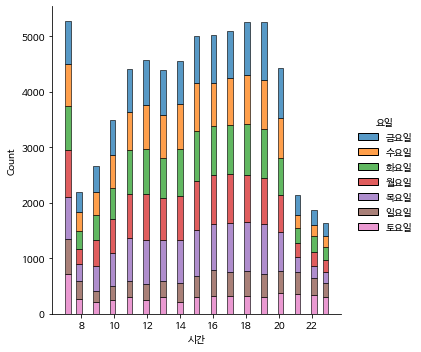

In [ ]:
fig= sns.displot(cctv_df, x='시간',hue='요일',multiple="stack")
plt.show()

<AxesSubplot:xlabel='요일', ylabel='시간'>

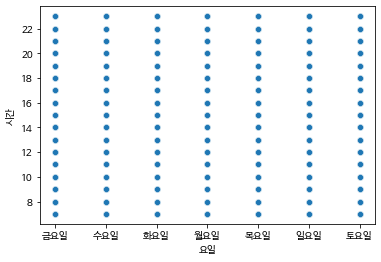

In [ ]:
sns.scatterplot(x='요일',y='시간',data=cctv_df)

In [ ]:
cctv_df['시간'].value_counts().sort_index()

7     5274
8     2187
9     2671
10    3500
11    4417
12    4580
13    4389
14    4547
15    5005
16    5026
17    5102
18    5253
19    5253
20    4429
21    2143
22    1876
23    1630
Name: 시간, dtype: int64

#### 지도시각화

In [10]:
cnt_cctv = cctv_df.groupby(['단속장소', '위도', '경도'])['단속일시'].count().reset_index()
cnt_cctv = cnt_cctv.rename(columns={'단속일시' : 'cnt'})
cnt_cctv.head(3)

,단속장소,위도,경도,cnt
0,MB모터스 옆,37.563661,127.078227,2363
1,강변 스파랜드 앞,37.535074,127.091264,1082
2,강변역 1번 출구,37.535668,127.094522,1503


In [27]:
cnt_cctv['위도'][0]

37.563661

In [12]:
import folium

In [38]:
m = folium.Map(location=[37.559785441853, 127.07426437494], tiles="OpenStreetMap", zoom_start=15)

In [42]:
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

for i in range(len(cnt_cctv)):
  # print(cnt_cctv[])
  folium.Marker(
    location=[cnt_cctv['위도'][i],cnt_cctv['경도'][i]],
    popup=cnt_cctv['단속장소'][i],
    icon=folium.Icon(color='red',icon='ok'),
  ).add_to(marker_cluster)

m